> ## **Line chart with styles**

### Allowed functions : ```import pandas as pd, import sqlite3```

In [1]:
import pandas as pd
import sqlite3

## анализировать только пользователей, а не администраторов
## анализировать только даты, когда были и просмотры, и подтверждения проверки

In [2]:
conn=sqlite3.connect('../data/checking-logs.sqlite')

query='''
select uid, datetime
from pageviews
where uid not like "admin%"
'''
df_view=pd.read_sql(query,conn, parse_dates='datetime')

In [3]:
view=df_view['datetime'].groupby(df_view['datetime'].dt.date).count()
view=view.rename('view')
view.index.name='date'
view


date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: view, dtype: int64

In [4]:
query='''
select uid, timestamp
from checker
where uid not like "admin%"
'''
df_checker=pd.read_sql(query,conn, parse_dates='timestamp')

In [5]:
checker=df_checker['timestamp'].groupby(df_checker['timestamp'].dt.date).count()
checker=checker.rename('commit')
checker.index.name='date'
checker

date
2020-04-17     23
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-28      5
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-02    242
2020-05-03    180
2020-05-04     37
2020-05-05    139
2020-05-06      2
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-10    143
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-15     10
2020-05-16      4
2020-05-17     48
2020-05-18      3
2020-05-19     34
2020-05-20     28
2020-05-21     49
Name: commit, dtype: int64

In [6]:
df_merge=pd.merge(view,checker,how='inner',on='date')
df_merge

,view,commit
date,,
2020-04-17,1,23
2020-04-18,23,69
2020-04-19,15,33
2020-04-21,3,25
2020-04-22,1,28
2020-04-23,5,43
2020-04-25,1,104
2020-04-26,8,261
2020-04-28,2,5


## размер шрифта должен быть 8
## размер фигуры (15,8)

<Axes: title={'center': 'Views and commit per day'}, xlabel='date'>

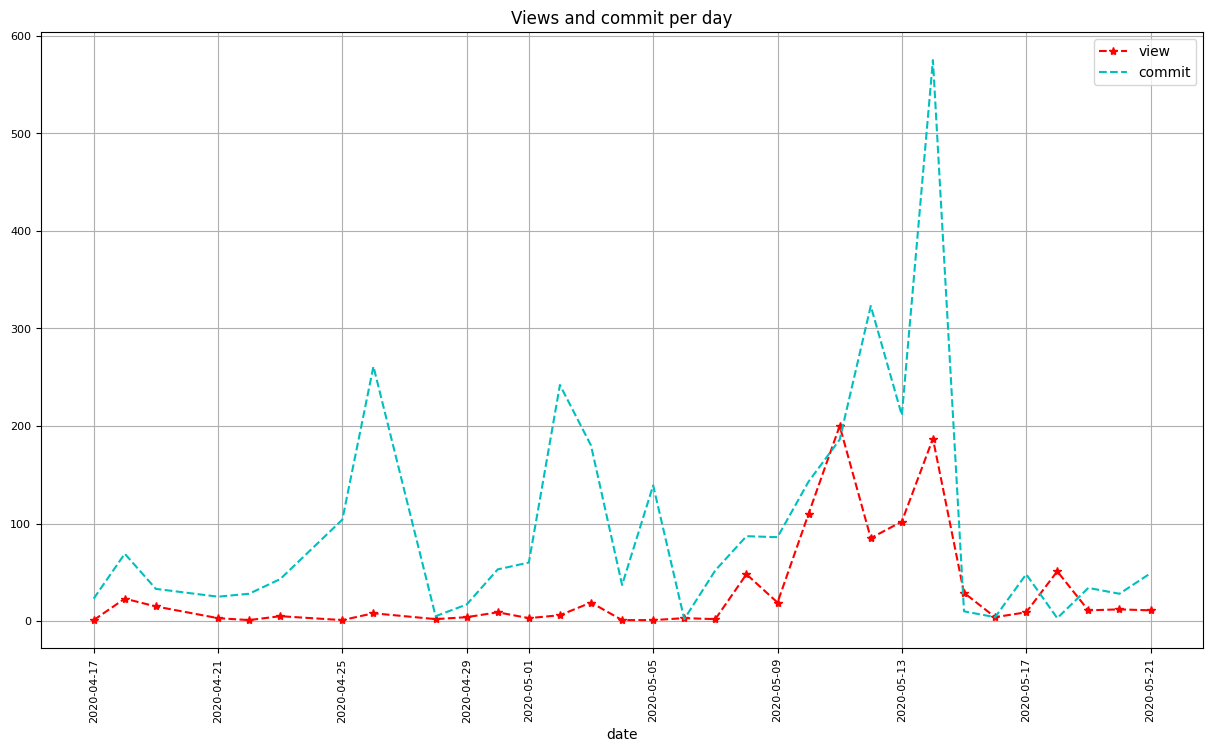

In [7]:
df_merge.plot(
    y=['view', 'commit'],
    kind='line',
    fontsize=8,
    figsize=(15,8),
    style=['--*','--'],
    color=['r','c'],
    legend=True,
    title='Views and commit per day',
    rot= 90,
    grid=True
)


## «Сколько раз количество просмотров превышало 150?»

In [13]:
print(f'Ответ {df_merge[df_merge['view']>150]['view'].count()}')


Ответ 2


In [14]:
conn.close()